### Student Performance Factor 

In [590]:
# Import the necessary libraries

# 1. Data manipulation
import pandas as pd 
import numpy as np

# 2. Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data preprocessing
from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,StandardScaler

# 4. Model selection 
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 5. Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Summary 
from tabulate import tabulate

### Step 1. Loading Dataset

In [591]:
# Load the dataset
df = pd.read_csv('C:/Users/Maftuna/Downloads/StudentPerformanceFactors.csv')
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [593]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Step 2. Data Cleaning

In [594]:
# Check for missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [595]:
# Handle misisng values 
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_28364\603214851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_28364\603214851.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [596]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [597]:
# Check for duplicates
df.duplicated().sum()

0

In [598]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Step 3. Exploratory Data Analysis (EDA)

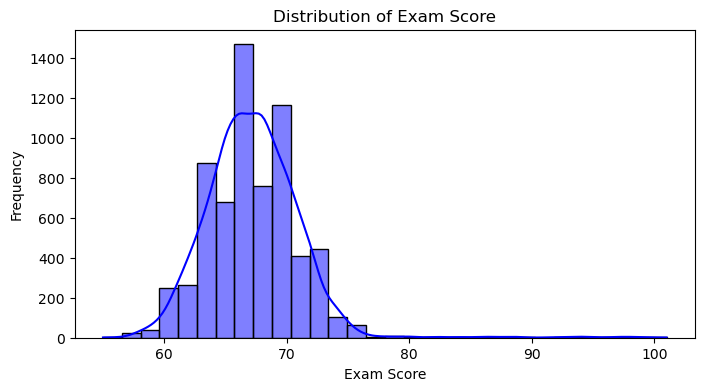

In [599]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8,4))
sns.histplot(df['Exam_Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


### Step 4. Data Transformation

In [600]:
# Cordinalate the categorical variables
df.select_dtypes(include='object').nunique()


Parental_Involvement          3
Access_to_Resources           3
Extracurricular_Activities    2
Motivation_Level              3
Internet_Access               2
Family_Income                 3
Teacher_Quality               3
School_Type                   2
Peer_Influence                3
Learning_Disabilities         2
Parental_Education_Level      3
Distance_from_Home            3
Gender                        2
dtype: int64

In [601]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Parental_Involvement: ['Low' 'Medium' 'High']
Access_to_Resources: ['High' 'Medium' 'Low']
Extracurricular_Activities: ['No' 'Yes']
Motivation_Level: ['Low' 'Medium' 'High']
Internet_Access: ['Yes' 'No']
Family_Income: ['Low' 'Medium' 'High']
Teacher_Quality: ['Medium' 'High' 'Low']
School_Type: ['Public' 'Private']
Peer_Influence: ['Positive' 'Negative' 'Neutral']
Learning_Disabilities: ['No' 'Yes']
Parental_Education_Level: ['High School' 'College' 'Postgraduate']
Distance_from_Home: ['Near' 'Moderate' 'Far']
Gender: ['Male' 'Female']


In [602]:
ordinal_features = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home'
]

or_encoder = OrdinalEncoder()
df[ordinal_features] =or_encoder.fit_transform(df[ordinal_features])


In [603]:
nominal_features = [
    'Extracurricular_Activities', 'Internet_Access', 'School_Type',
    'Learning_Disabilities', 'Gender'
]

l_encoder = LabelEncoder()

for col in nominal_features:
    df[col] = l_encoder.fit_transform(df[col])

In [604]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2.0,3,0,1.0,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0.0,4,0,0.0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1.0,4,0,2.0,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0.0,4,0,1.0,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1.0,4,0,0.0,2.0,0,70


In [605]:
# Scaling the numerical features

scaling = StandardScaler()
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Exam_Score')
df[num_cols] = scaling.fit_transform(df[num_cols])

In [606]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.504942,0.348375,-0.254249,-1.380517,-1.214685,-0.019796,-0.143800,-0.393061,0.285825,-1.213934,-0.284883,0.768332,0.661006,1.070550,0.031411,-0.342867,0.148221,0.748407,0.855746,67
1,-0.162822,-1.383736,-0.254249,0.913804,-1.214685,0.661399,-1.116110,-0.393061,0.285825,0.411451,1.062448,0.768332,0.661006,-1.575587,1.001199,-0.342867,-1.283503,-0.743665,-1.168570,61
2,0.671882,1.560853,0.901062,0.913804,0.823259,-0.019796,1.106313,0.884966,0.285825,0.411451,1.062448,0.768332,0.661006,-0.252518,1.001199,-0.342867,1.579946,0.748407,0.855746,74
3,1.506587,0.781403,-0.254249,0.913804,0.823259,0.661399,1.592469,0.884966,0.285825,-0.401242,1.062448,0.768332,0.661006,-1.575587,1.001199,-0.342867,0.148221,-0.743665,0.855746,71
4,-0.162822,1.041220,0.901062,0.913804,0.823259,-0.700990,-0.699406,0.884966,0.285825,1.224144,1.062448,-1.462550,0.661006,-0.252518,1.001199,-0.342867,-1.283503,0.748407,-1.168570,70


### Step 5: Feature Selection and Engineering

In [607]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

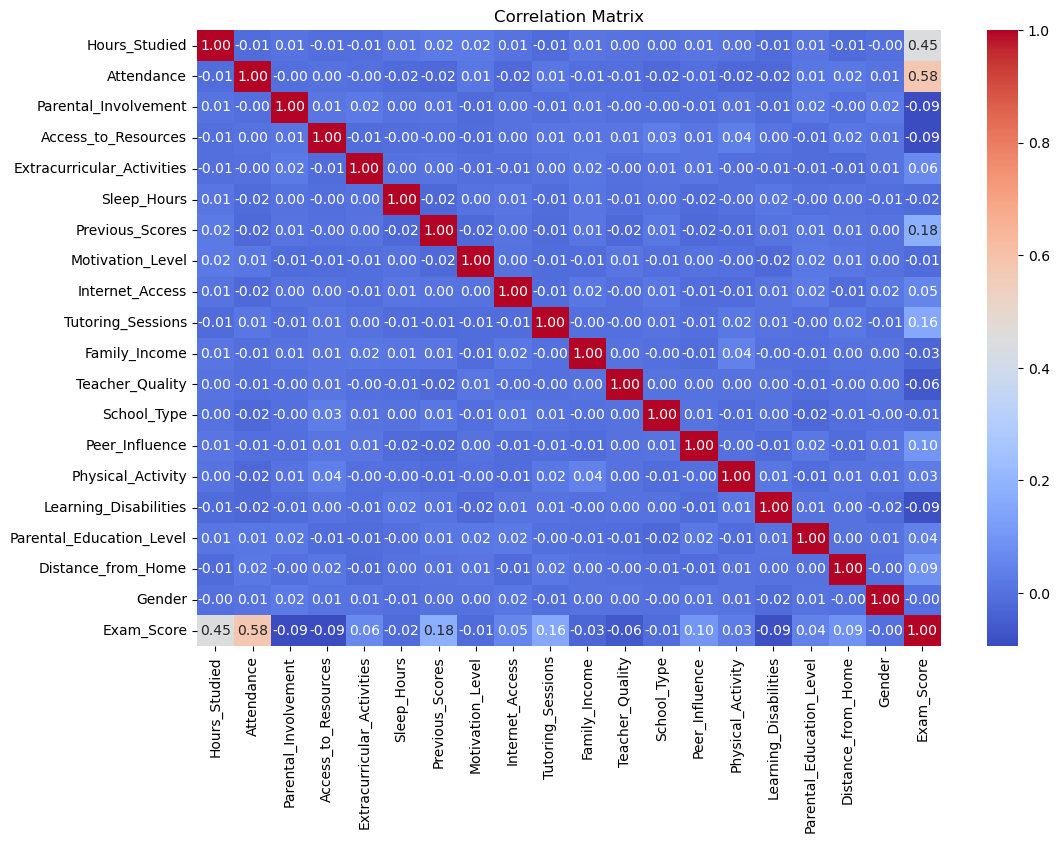

In [608]:
# Check the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

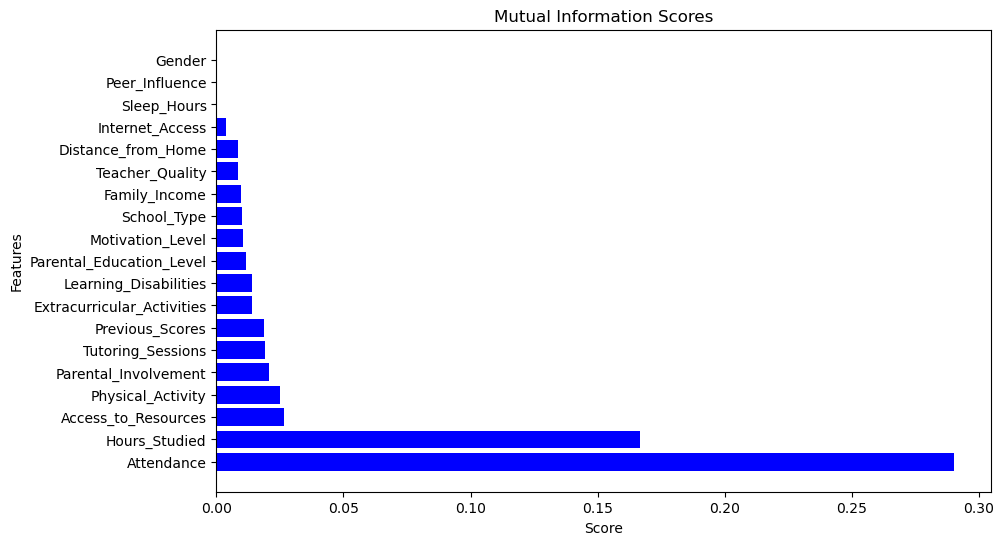

Attendance                    0.290471
Hours_Studied                 0.166873
Access_to_Resources           0.026462
Physical_Activity             0.025149
Parental_Involvement          0.020525
Tutoring_Sessions             0.019184
Previous_Scores               0.018911
Extracurricular_Activities    0.013988
Learning_Disabilities         0.013919
Parental_Education_Level      0.011816
Motivation_Level              0.010311
School_Type                   0.010054
Family_Income                 0.009723
Teacher_Quality               0.008687
Distance_from_Home            0.008433
Internet_Access               0.003829
Sleep_Hours                   0.000000
Peer_Influence                0.000000
Gender                        0.000000
dtype: float64


In [609]:
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(mi_scores.index, mi_scores.values, color='blue')
plt.title('Mutual Information Scores')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()
print(mi_scores)

In [610]:
# Create a new DataFrame with the selected features
df['internet_sleep_combo'] = df['Internet_Access'] * df['Sleep_Hours']
df['study_time_quality'] = df['Hours_Studied'] * df['Teacher_Quality']
df['family_income_quality'] = df['Family_Income'] * df['Parental_Education_Level']


In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   float64
 2   Parental_Involvement        6607 non-null   float64
 3   Access_to_Resources         6607 non-null   float64
 4   Extracurricular_Activities  6607 non-null   float64
 5   Sleep_Hours                 6607 non-null   float64
 6   Previous_Scores             6607 non-null   float64
 7   Motivation_Level            6607 non-null   float64
 8   Internet_Access             6607 non-null   float64
 9   Tutoring_Sessions           6607 non-null   float64
 10  Family_Income               6607 non-null   float64
 11  Teacher_Quality             6607 non-null   float64
 12  School_Type                 6607 non-null   float64
 13  Peer_Influence              6607 

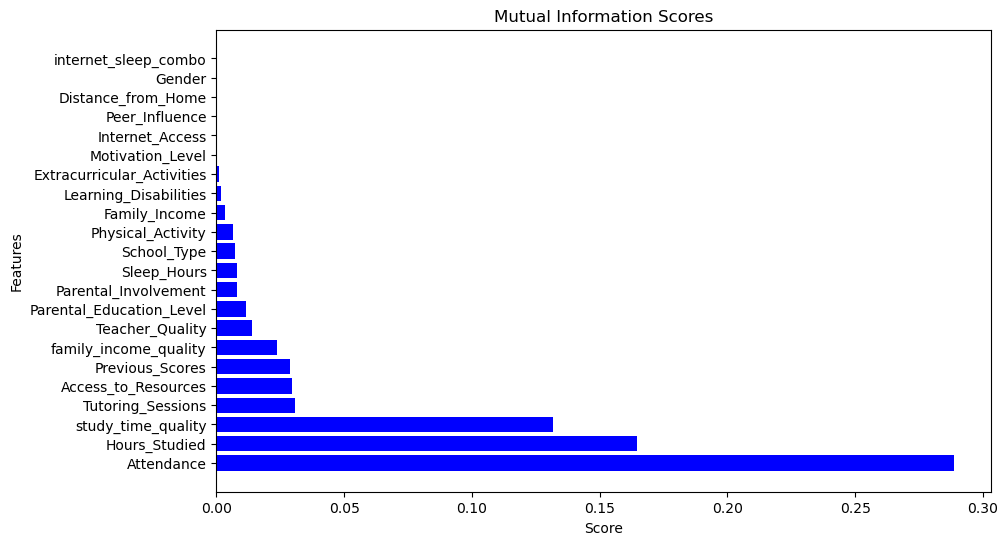

Attendance                    0.288868
Hours_Studied                 0.164497
study_time_quality            0.131667
Tutoring_Sessions             0.030701
Access_to_Resources           0.029674
Previous_Scores               0.028810
family_income_quality         0.023685
Teacher_Quality               0.013741
Parental_Education_Level      0.011504
Parental_Involvement          0.008228
Sleep_Hours                   0.007990
School_Type                   0.007194
Physical_Activity             0.006669
Family_Income                 0.003236
Learning_Disabilities         0.001770
Extracurricular_Activities    0.000852
Motivation_Level              0.000000
Internet_Access               0.000000
Peer_Influence                0.000000
Distance_from_Home            0.000000
Gender                        0.000000
internet_sleep_combo          0.000000
dtype: float64


In [612]:
# X ni yangilash
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# MI qayta ishlatish
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Grafik
plt.figure(figsize=(10, 6))
plt.barh(mi_scores.index, mi_scores.values, color='blue')
plt.title('Mutual Information Scores')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()
print(mi_scores)

### Step 6. Split Data and Build Models

In [613]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the models


In [614]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [615]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

In [616]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2', ascending=False)
results_df




,MSE,MAE,R2
Gradient Boosting,3.826021,0.821372,0.729324
Linear Regression,4.401065,1.015377,0.688642
XGBoost,4.752240,0.981416,0.663798
Random Forest,4.901650,1.129637,0.653228


In [617]:
# Tabulate the results

reuslt_1 = [
    ['Gradient Boosting', 3.826021, 0.821372, 0.729324],
    ['Linear Regression', 4.401065, 1.015377, 0.688642],
    ['XGBoost', 4.752240, 0.981416, 0.663798],
    ['Random Forest', 4.901650, 1.129637, 0.653228]

]

headers = ['Model', 'MSE', 'MAE', 'R2']

print(tabulate(reuslt_1, headers=headers, tablefmt='grid'))

+-------------------+---------+----------+----------+
| Model             |     MSE |      MAE |       R2 |
+===================+=========+==========+==========+
| Gradient Boosting | 3.82602 | 0.821372 | 0.729324 |
+-------------------+---------+----------+----------+
| Linear Regression | 4.40107 | 1.01538  | 0.688642 |
+-------------------+---------+----------+----------+
| XGBoost           | 4.75224 | 0.981416 | 0.663798 |
+-------------------+---------+----------+----------+
| Random Forest     | 4.90165 | 1.12964  | 0.653228 |
+-------------------+---------+----------+----------+


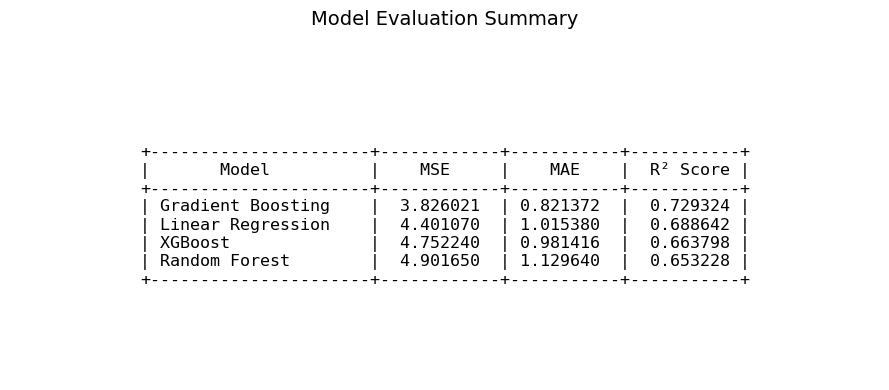

In [618]:

summary_text = """
+----------------------+------------+-----------+-----------+
|       Model          |    MSE     |    MAE    |  R² Score |
+----------------------+------------+-----------+-----------+
| Gradient Boosting    |  3.826021  | 0.821372  |  0.729324 |
| Linear Regression    |  4.401070  | 1.015380  |  0.688642 |
| XGBoost              |  4.752240  | 0.981416  |  0.663798 |
| Random Forest        |  4.901650  | 1.129640  |  0.653228 |
+----------------------+------------+-----------+-----------+
"""



import matplotlib.pyplot as plt

# Plotting the summary neatly
plt.figure(figsize=(9, 4))  # Adjust width and height
plt.text(0.5, 0.5, summary_text, fontsize=12, family='monospace',
         verticalalignment='center', horizontalalignment='center')  # Centered
plt.axis('off')  # No axes
plt.title("Model Evaluation Summary", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig("model_summary_table.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_28364\2523041446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')


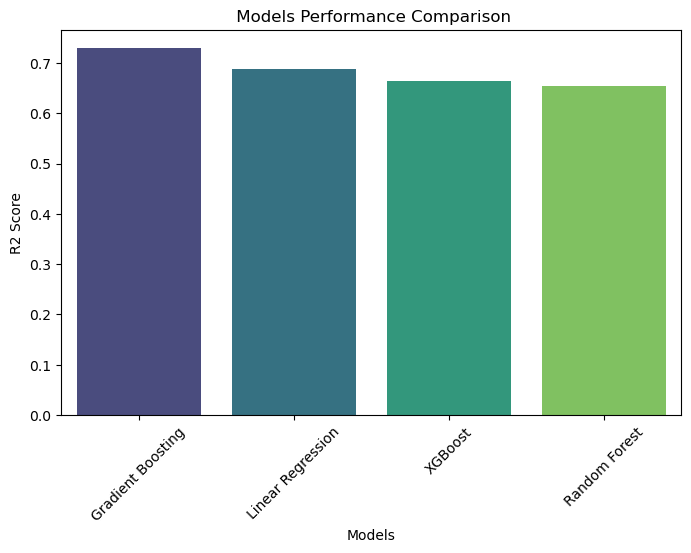

In [619]:
# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')
plt.title(' Models Performance Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

In [620]:
low_mi = ['Internet_Access', 'Sleep_Hours', 'Learning_Disabilities',
          'Parental_Education_Level', 'Extracurricular_Activities']

# Agar yangi feature'laring df ga qo‘shilgan bo‘lsa, shu yerda yangilab olamiz:
X_reduced_new = df.drop(columns=low_mi + ['Exam_Score'])
y = df['Exam_Score']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced_new, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results_updated = {}

for name, model in models.items():
    model.fit(X_train2, y_train2)
    y_pred = model.predict(X_test2)
    mse = mean_squared_error(y_test2, y_pred)
    mae = mean_absolute_error(y_test2, y_pred)
    r2 = r2_score(y_test2, y_pred)
    results_updated[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}


                        MSE       MAE        R2
Gradient Boosting  3.807012  0.842552  0.730669
Linear Regression  4.523613  1.084526  0.679972
XGBoost            4.761612  1.026196  0.663135
Random Forest      4.964412  1.141785  0.648788


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_28364\793765349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_updated.index, y='R2', data=results_df_updated, palette='viridis')


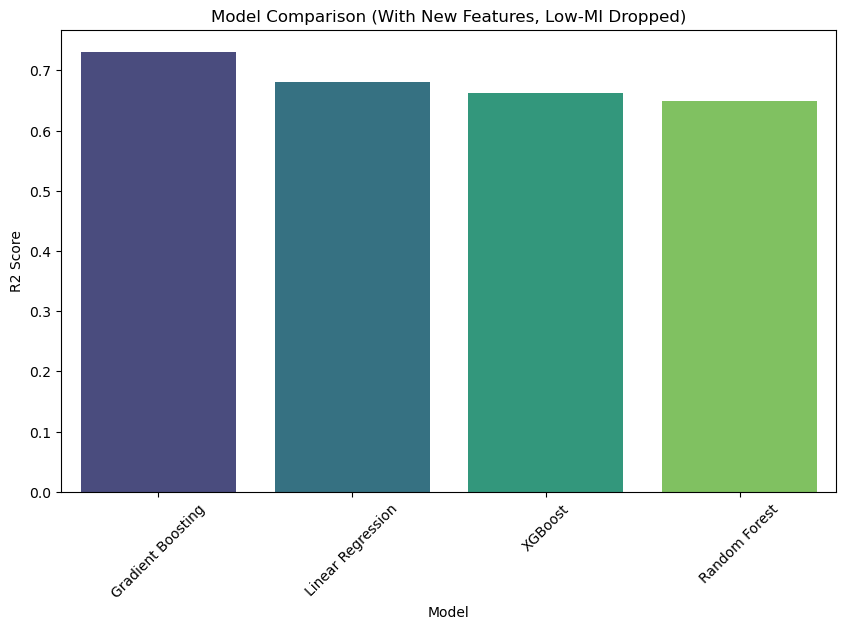

+-------------------+---------+----------+----------+
| Model             |     MSE |      MAE |       R2 |
+===================+=========+==========+==========+
| Gradient Boosting | 3.80701 | 0.842552 | 0.730669 |
+-------------------+---------+----------+----------+
| Linear Regression | 4.52361 | 1.08453  | 0.679972 |
+-------------------+---------+----------+----------+
| XGBoost           | 4.76161 | 1.0262   | 0.663135 |
+-------------------+---------+----------+----------+
| Random Forest     | 4.96441 | 1.14179  | 0.648788 |
+-------------------+---------+----------+----------+


In [621]:
results_df_updated = pd.DataFrame(results_updated).T.sort_values(by='R2', ascending=False)
print(results_df_updated)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df_updated.index, y='R2', data=results_df_updated, palette='viridis')
plt.title('Model Comparison (With New Features, Low-MI Dropped)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

# Create a table with the results
result = [
    ['Gradient Boosting', 3.807012, 0.842552, 0.730669],
    ['Linear Regression', 4.523613, 1.084526, 0.679972],
    ['XGBoost', 4.761612, 1.026196, 0.663135],
    ['Random Forest', 4.964412, 1.141785, 0.648788]
]

headers = ['Model', 'MSE', 'MAE', 'R2']
print(tabulate(result, headers=headers, tablefmt='grid'))



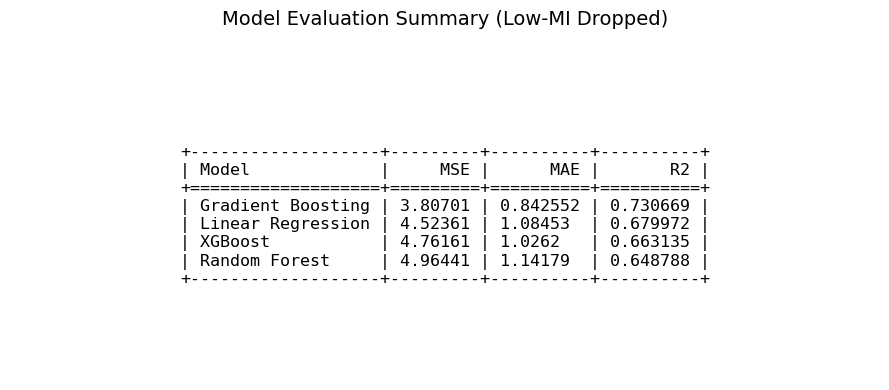

In [622]:
summary_text = """

+-------------------+---------+----------+----------+
| Model             |     MSE |      MAE |       R2 |
+===================+=========+==========+==========+
| Gradient Boosting | 3.80701 | 0.842552 | 0.730669 |
| Linear Regression | 4.52361 | 1.08453  | 0.679972 |
| XGBoost           | 4.76161 | 1.0262   | 0.663135 |
| Random Forest     | 4.96441 | 1.14179  | 0.648788 |
+-------------------+---------+----------+----------+

"""



import matplotlib.pyplot as plt

# Plotting the summary neatly
plt.figure(figsize=(9, 4))  # Adjust width and height
plt.text(0.5, 0.5, summary_text, fontsize=12, family='monospace',
         verticalalignment='center', horizontalalignment='center')  # Centered
plt.axis('off')  # No axes
plt.title("Model Evaluation Summary (Low-MI Dropped)", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig("model_summary_table.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

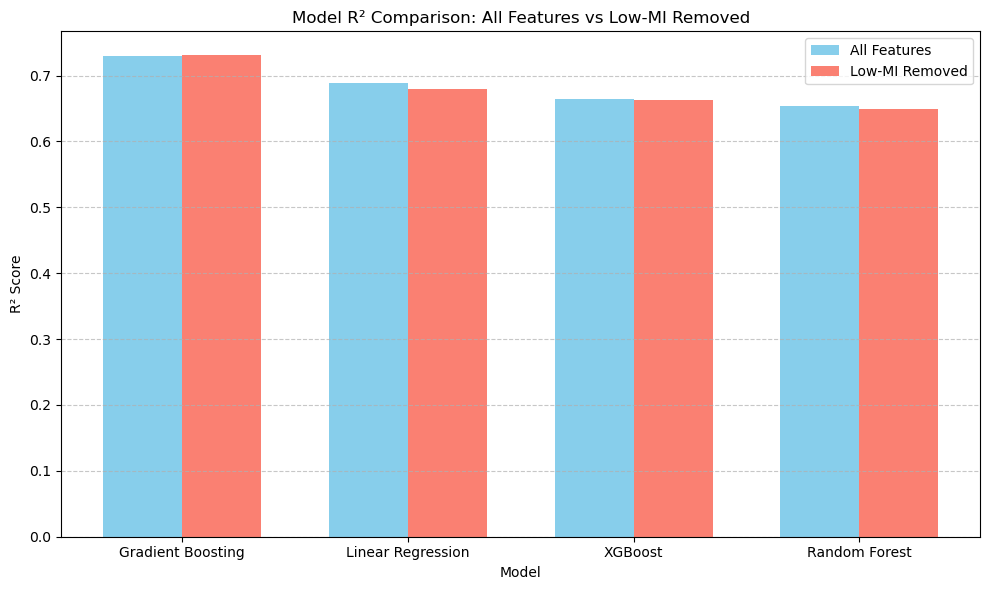

In [623]:

# Re-import necessary packages after code state reset
import pandas as pd
import matplotlib.pyplot as plt

# Corrected and accurate values from your experiments
data = {
    'Model': ['Gradient Boosting', 'Linear Regression', 'XGBoost', 'Random Forest'],
    'R2_All_Features': [0.729324, 0.688642, 0.663798, 0.653228],
    'R2_Low_MI_Removed': [0.730669, 0.679972, 0.663135, 0.648788],
    'MSE_All_Features': [3.826021, 4.401070, 4.752240, 4.901650],
    'MSE_Low_MI_Removed': [3.807012, 4.523613, 4.761612, 4.964412],
}

df_comparison = pd.DataFrame(data)

# Plot R² comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_comparison['Model']))
plt.bar(x, df_comparison['R2_All_Features'], width=bar_width, label='All Features', color='skyblue')
plt.bar([i + bar_width for i in x], df_comparison['R2_Low_MI_Removed'], width=bar_width, label='Low-MI Removed', color='salmon')

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model R² Comparison: All Features vs Low-MI Removed')
plt.xticks([i + bar_width / 2 for i in x], df_comparison['Model'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()





In [624]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,internet_sleep_combo,study_time_quality,family_income_quality
0,0.504942,0.348375,-0.254249,-1.380517,-1.214685,-0.019796,-0.143800,-0.393061,0.285825,-1.213934,...,1.070550,0.031411,-0.342867,0.148221,0.748407,0.855746,67,-0.005658,0.387963,-0.042226
1,-0.162822,-1.383736,-0.254249,0.913804,-1.214685,0.661399,-1.116110,-0.393061,0.285825,0.411451,...,-1.575587,1.001199,-0.342867,-1.283503,-0.743665,-1.168570,61,0.189045,-0.125102,-1.363655
2,0.671882,1.560853,0.901062,0.913804,0.823259,-0.019796,1.106313,0.884966,0.285825,0.411451,...,-0.252518,1.001199,-0.342867,1.579946,0.748407,0.855746,74,-0.005658,0.516229,1.678611
3,1.506587,0.781403,-0.254249,0.913804,0.823259,0.661399,1.592469,0.884966,0.285825,-0.401242,...,-1.575587,1.001199,-0.342867,0.148221,-0.743665,0.855746,71,0.189045,1.157560,0.157478
4,-0.162822,1.041220,0.901062,0.913804,0.823259,-0.700990,-0.699406,0.884966,0.285825,1.224144,...,-0.252518,1.001199,-0.342867,-1.283503,0.748407,-1.168570,70,-0.200361,0.238136,-1.363655


In [625]:
# Classification model

df['Exam_Result'] = (df['Exam_Score'] >=70).astype(int)  # 1 for pass, 0 for fail
df['Exam_Result'].value_counts()

Exam_Result
0    4982
1    1625
Name: count, dtype: int64

In [626]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [627]:
# Split the data into features and target variable
X = df.drop(columns=['Exam_Score', 'Exam_Result']) 
y = df['Exam_Result']  

In [628]:
# Train/Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [629]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results_classification = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = model.score(X_test, y_test)
    auc = roc_auc_score(y_test, y_pred_proba)
    results_classification[model_name] = {'Accuracy': accuracy, 'AUC': auc}
results_classification_df = pd.DataFrame(results_classification).T.sort_values(by='AUC', ascending=False)
print(results_classification_df)



                     Accuracy       AUC
XGBoost              0.946293  0.982626
Random Forest        0.919062  0.970630
Logistic Regression  0.920575  0.969612


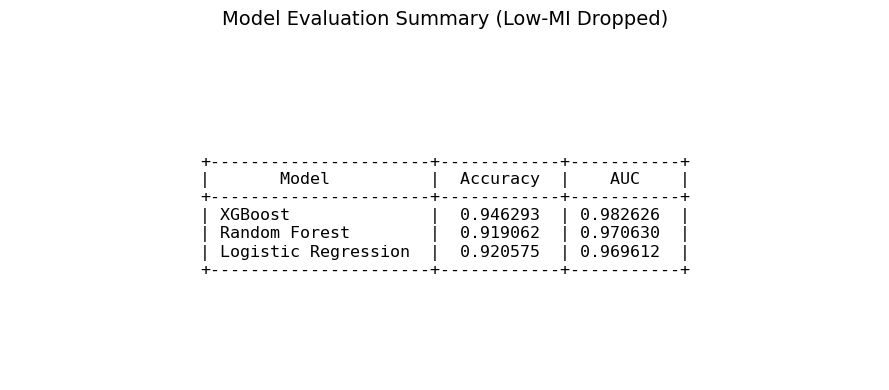

In [630]:
summary_text = """

+----------------------+------------+-----------+
|       Model          |  Accuracy  |    AUC    |
+----------------------+------------+-----------+
| XGBoost              |  0.946293  | 0.982626  |
| Random Forest        |  0.919062  | 0.970630  |
| Logistic Regression  |  0.920575  | 0.969612  |
+----------------------+------------+-----------+

"""



import matplotlib.pyplot as plt

# Plotting the summary neatly
plt.figure(figsize=(9, 4))  # Adjust width and height
plt.text(0.5, 0.5, summary_text, fontsize=12, family='monospace',
         verticalalignment='center', horizontalalignment='center')  # Centered
plt.axis('off')  # No axes
plt.title("Model Evaluation Summary (Low-MI Dropped)", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig("model_summary_table.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

C:\Users\Maftuna\AppData\Local\Temp\ipykernel_28364\4044304135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_classification_df.index, y='AUC', data=results_classification_df, palette='viridis')


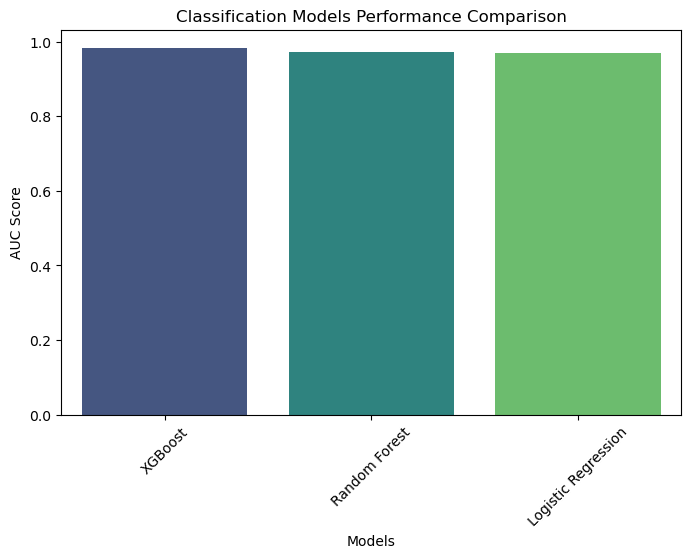

In [631]:
# Visualize the results
results_classification_df = pd.DataFrame(results_classification).T
results_classification_df = results_classification_df.sort_values(by='AUC', ascending=False)
results_classification_df
plt.figure(figsize=(8, 5))  
sns.barplot(x=results_classification_df.index, y='AUC', data=results_classification_df, palette='viridis')
plt.title('Classification Models Performance Comparison')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.show()




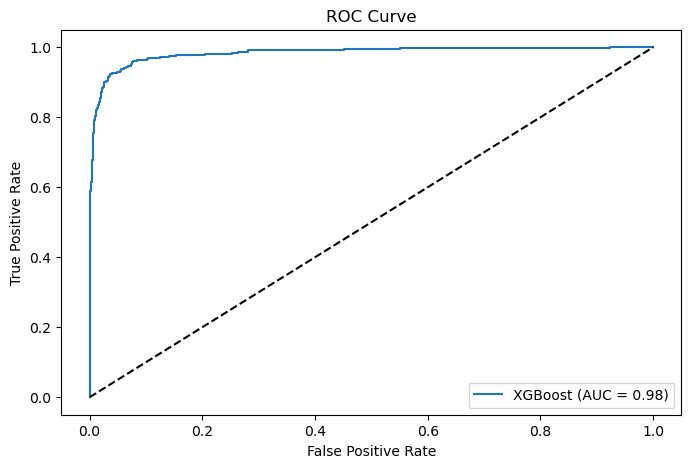

In [632]:
# Plot ROC curve for the best model (e.g., XGBoost)
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()